# CSIRO Suspended Sediment Trend
Using AGDC v2 API, we can extract a sample Landsat 5 slice. Suspended Sediment Trend is done by taking the average of two bands.

In [1]:
from matplotlib import pyplot as plt
import matplotlib.image
%matplotlib inline

import datacube.api
import datacube.api.geo_xarray # 2016.03.22: geo_xarray is not part of the agdc-v2-dev module yet

import xarray
from pprint import pprint

/usr/local/lib/python2.7/site-packages/matplotlib-1.5.1-py2.7-macosx-10.10-x86_64.egg/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


We first verify that `LEDAPS` is available in our database and load it.

In [2]:
dc = datacube.api.API()
print(dc.list_field_values('product'))
ledaps = dc.get_dataset(product='LEDAPS', platform='LANDSAT_5', x=(140, 141), y=(-35.9, -36.5))

[u'LEDAPS']


We can save a slice of RGB bands into memory. Then we take a small slice and plot it.

> **note:** If the slice is too large, it may take a while.

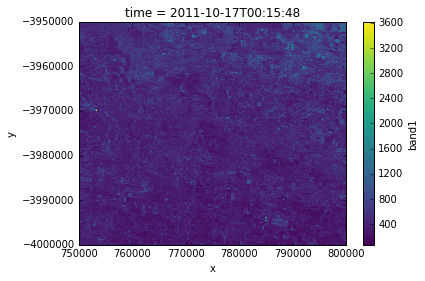

In [3]:
blue = ledaps.band1
green = ledaps.band2
red = ledaps.band3

sr = red.isel(time=0).sel(x=slice(750000, 800000), y=slice(-3950000, -4000000)) # Northings and Eastings
sg = green.isel(time=0).sel(x=slice(750000, 800000), y=slice(-3950000, -4000000))
sb = blue.isel(time=0).sel(x=slice(750000, 800000), y=slice(-3950000, -4000000))
sb.plot() # plot the blue slice

We can take the green and blue bands, take the average, and save it to file. The image is saved at the same location as the notebook root folder.

`geo_xarray.reproject` reprojects northings and eastings to longitude and latitude units.

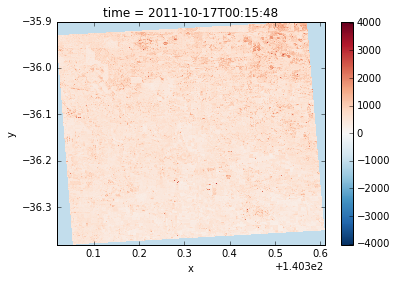

In [4]:
band_maths = (sb + sg) / 2
band_maths.name = 'Band Maths'
reprojected = datacube.api.geo_xarray.reproject(band_maths, 'EPSG:3577', 'WGS84')
reprojected.plot()

matplotlib.image.imsave('chlorophyll_approx.png', reprojected)

The boundaries are as follows:

In [5]:
map(float, (reprojected.x[0], reprojected.x[-1], reprojected.y[0], reprojected.y[-1]))

[140.3187048680277, 140.90980383946007, -35.90085773120309, -36.38075732959616]